### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [72]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/7_lesson/materials/processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [73]:
initial_data = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/7_lesson/materials/taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [74]:
initial_data.shape[0] == processed_data.shape[0]

True

In [75]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [76]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [77]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [78]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [79]:
processed_data.day_of_week.unique()

array([0, 6, 1, 2, 5, 4, 3], dtype=int64)

Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

<Figure size 1600x1000 with 2 Axes>

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


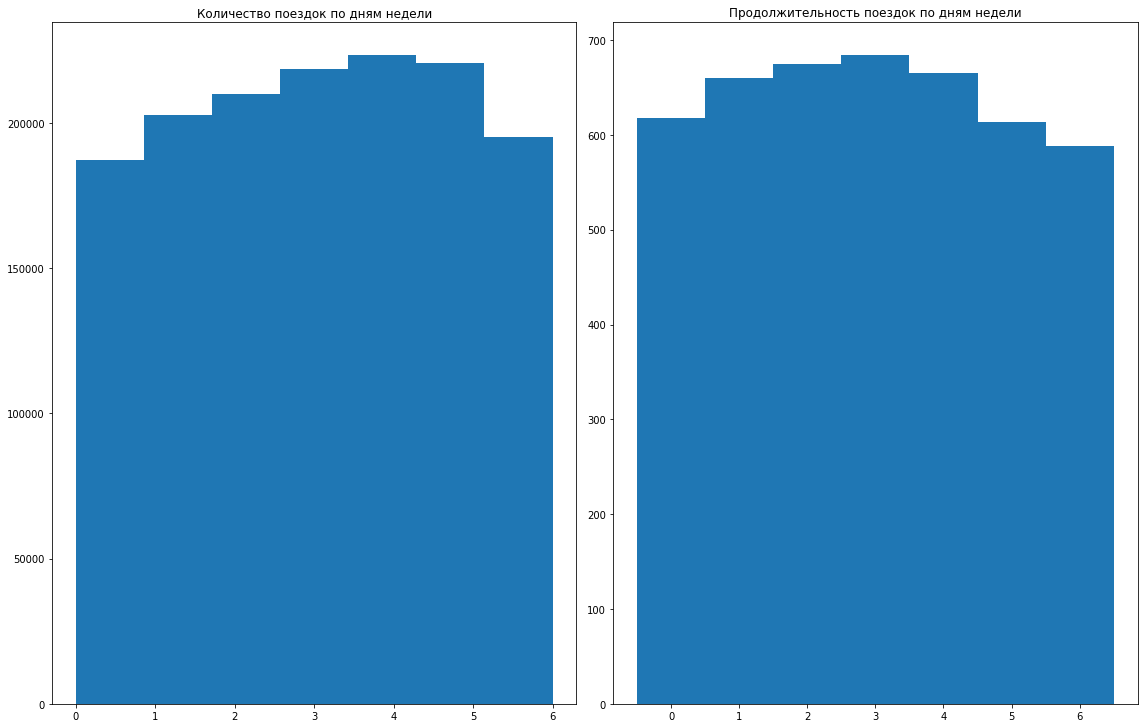

In [126]:
# Количество поездок/Средняя продолжительность поездки vs День недели
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.day_of_week.unique().shape[0])
#plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        np.exp(processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration']),
        width=1)
#plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Продолжительность поездок по дням недели')

plt.show()


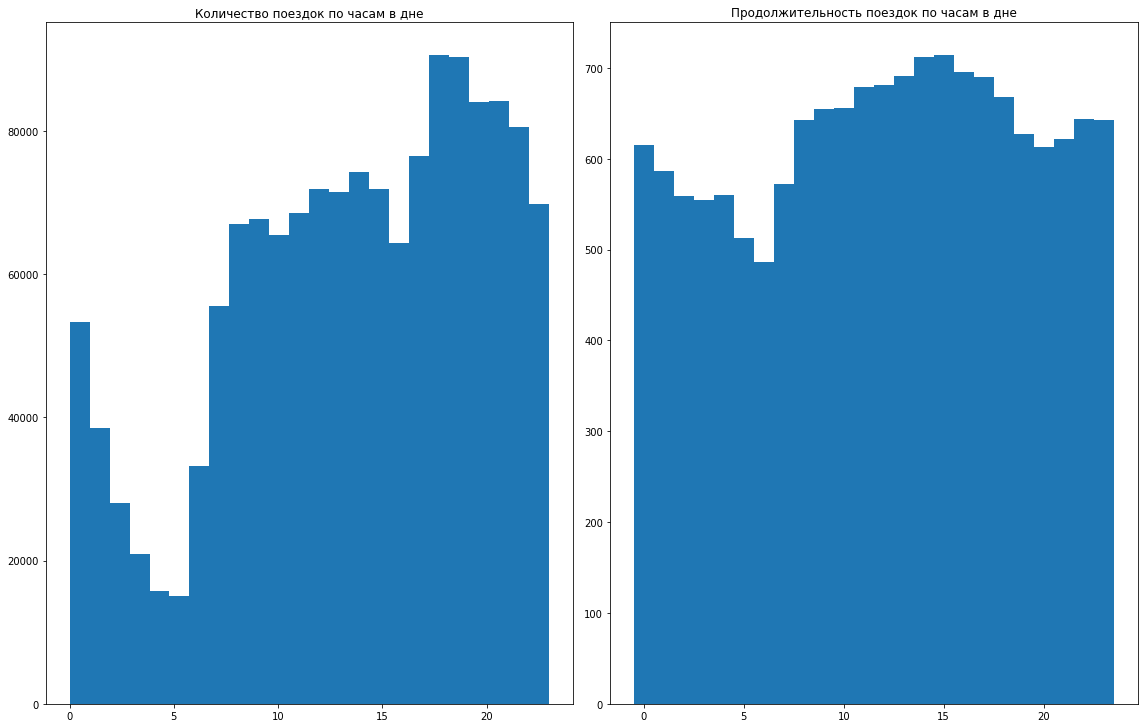

In [22]:
# Количество поездок/Средняя продолжительность поездки vs время суток
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data.hour.unique().shape[0])
#plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        np.exp(processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration']),
        width=1)
#plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по часам в дне')
ax_2.set(title = 'Продолжительность поездок по часам в дне')

plt.show()


In [9]:
# Количество поездок в течение суток обычно положительно коррелирует со средней продолжительностью поездок
processed_data.groupby('hour', as_index=False)['log_trip_duration'].agg(['count', 'mean']).corr()

,count,mean
count,1.00000,0.76506
mean,0.76506,1.00000


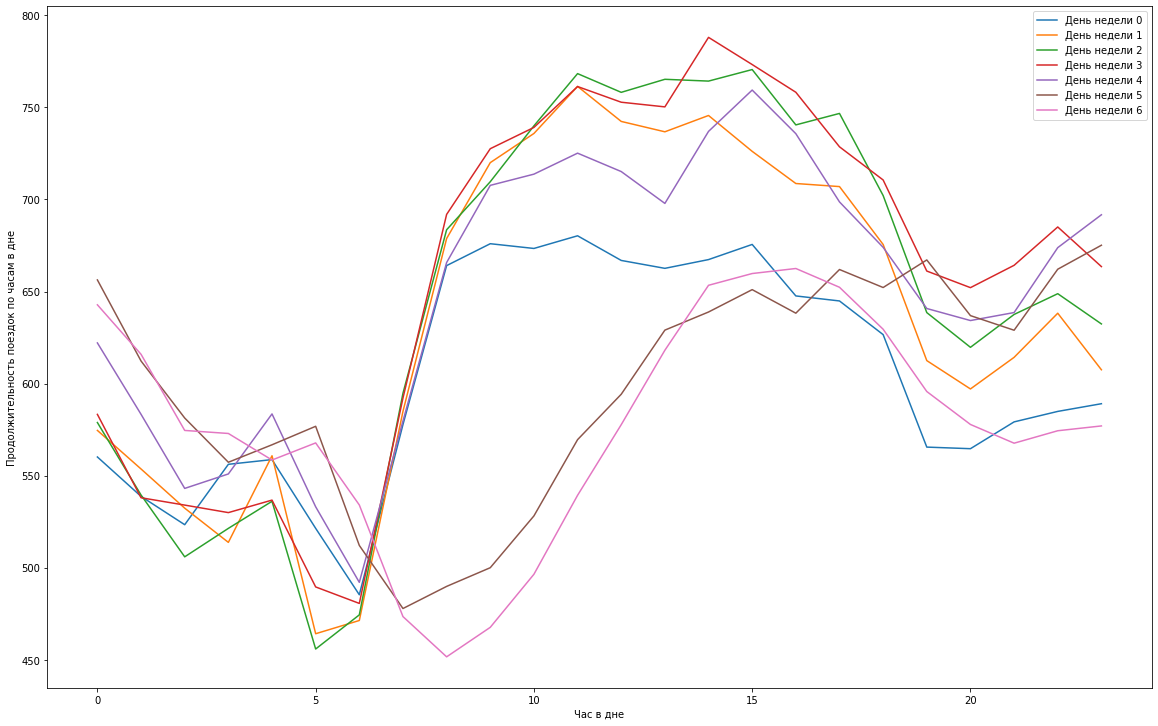

In [32]:
# Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
fig = plt.figure()

fig.set_size_inches(16, 10)

for i in range(7):
    day_of_week_data = processed_data[
        processed_data['day_of_week'] == i
    ]
    plt.plot(sorted(list(day_of_week_data['hour'].unique())), 
            np.exp(day_of_week_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration']))

fig.tight_layout()

plt.ylabel('Продолжительность поездок по часам в дне')
plt.xlabel('Час в дне')
plt.legend([f'День недели {i}' for i in range(7)])

plt.show()


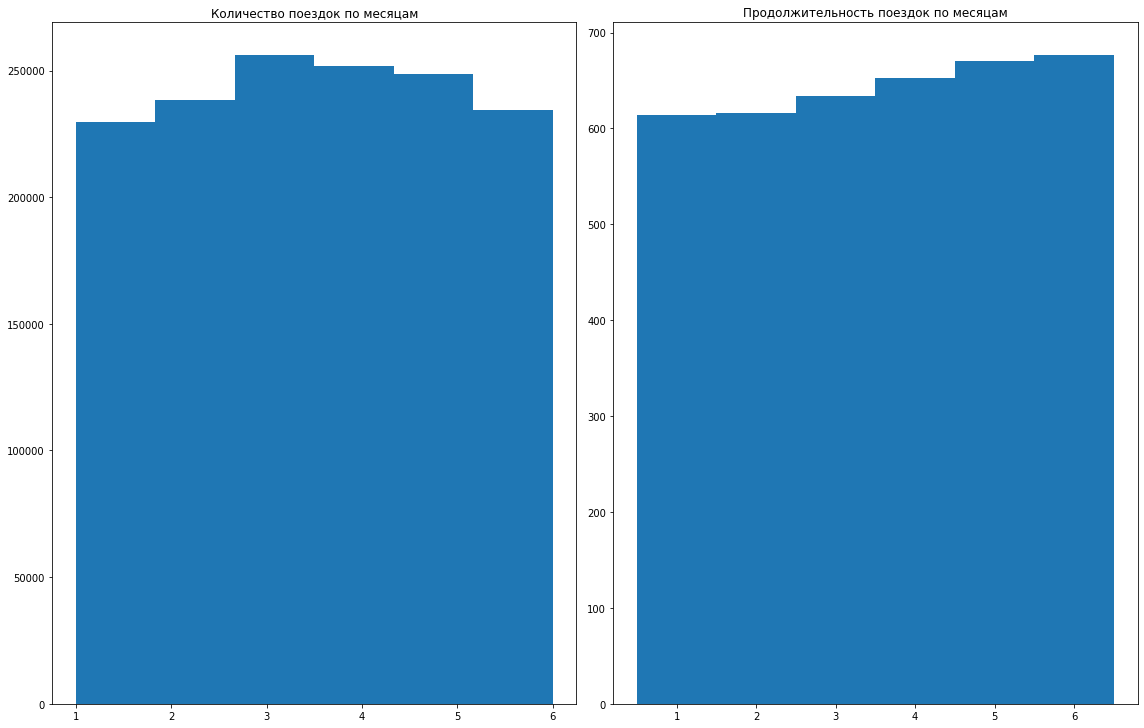

In [33]:
# Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
# Количество поездок/Средняя продолжительность поездки vs месяц
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['month'], bins=processed_data.month.unique().shape[0])
#plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['month'].unique())), 
        np.exp(processed_data.groupby('month', as_index=False)['log_trip_duration'].mean()['log_trip_duration']),
        width=1)
#plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по месяцам')
ax_2.set(title = 'Продолжительность поездок по месяцам')

plt.show()

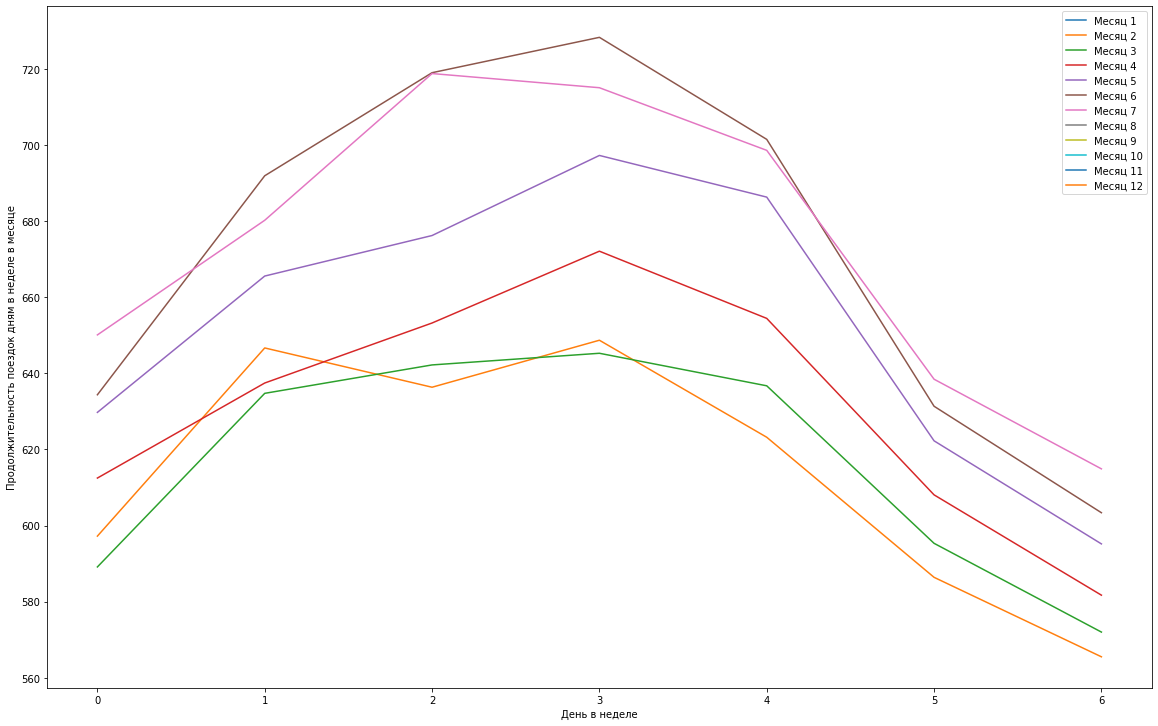

In [56]:
fig = plt.figure()

fig.set_size_inches(16, 10)

for i in range(12):
    month_data = processed_data[
        processed_data['month'] == i
    ]
    plt.plot(sorted(list(month_data['day_of_week'].unique())), 
            np.exp(month_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration']))

fig.tight_layout()

plt.ylabel('Продолжительность поездок дням в неделе в месяце')
plt.xlabel('День в неделе')
plt.legend([f'Месяц {i}' for i in range(1, 13)])

plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

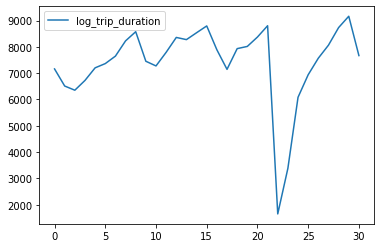

In [128]:
processed_data[
    processed_data['month'] == 1
].groupby('date', as_index=False)['log_trip_duration'].count().plot()

In [49]:
processed_data[['date']].dtypes

date    object
dtype: object

In [80]:
### Создадим первый бинарный признак
### Your code is here
processed_data['anomaly'] = (processed_data['date'].astype(str) == '2016-01-22')

In [81]:
processed_data['anomaly'].sum()

8805

In [ ]:
### Создадим второй бинарный признак

In [83]:
# Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета.
traffic_jam = \
processed_data.groupby(['day_of_week', 'hour'], 
                       as_index=False) \
               ['log_trip_duration'] \
               .mean() \
               .sort_values(by='log_trip_duration', ascending=False) \
               .head(10) \
               [['day_of_week', 'hour']].copy()

In [84]:
traffic_jam['traffic_jam'] = 1

In [85]:
traffic_jam

,day_of_week,hour,traffic_jam
86,3,14,1
87,3,15,1
63,2,15,1
59,2,11,1
61,2,13,1
62,2,14,1
35,1,11,1
83,3,11,1
111,4,15,1
88,3,16,1


In [86]:
processed_data = processed_data.merge(traffic_jam, 
                                      left_on=['day_of_week', 'hour'], 
                                      right_on=['day_of_week', 'hour'], 
                                      how='left')

In [87]:
processed_data['traffic_jam'] = processed_data['traffic_jam'].fillna(0)

In [88]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
0,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,False,0.0
1,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,False,0.0
2,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,False,1.0
3,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,False,0.0
4,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,False,0.0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [89]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [90]:
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
0,1,930.399753,0,1.500479,6.122493,0,17,3,False,0.0
1,0,930.399753,0,1.807119,6.498282,6,0,6,False,0.0
2,1,930.399753,0,6.392080,7.661527,1,11,1,False,1.0
3,1,930.399753,0,1.487155,6.063785,2,19,4,False,0.0
4,1,930.399753,0,1.189925,6.077642,5,13,3,False,0.0
...,...,...,...,...,...,...,...,...,...,...
1458639,1,1053.529749,0,1.226296,6.658011,4,13,4,False,0.0
1458640,0,930.399753,0,6.056935,6.486161,6,7,1,False,0.0
1458641,1,930.399753,0,7.832952,6.639876,4,6,4,False,0.0
1458642,0,930.399753,0,1.093786,5.924256,1,15,1,False,0.0


In [55]:
pd.get_dummies(processed_data['day_of_week'])

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
1458639,0,0,0,0,1,0,0
1458640,0,0,0,0,0,0,1
1458641,0,0,0,0,1,0,0
1458642,0,1,0,0,0,0,0


In [56]:
processed_data.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'distance_km',
       'log_trip_duration', 'day_of_week', 'hour', 'month', 'anomaly',
       'traffic_jam'],
      dtype='object')

In [57]:
# https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
data_encoder = OneHotEncoder()

In [93]:
data_encoder.fit_transform(processed_data[['day_of_week']])

<1458644x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1458644 stored elements in Compressed Sparse Row format>

In [94]:
processed_data = pd.DataFrame(processed_data.toarray(), columns=data_encoder.get_feature_names_out(), dtype=int)

AttributeError: 'DataFrame' object has no attribute 'toarray'

In [95]:
data_encoder = OneHotEncoder()

In [96]:
transformed = data_encoder.transform(processed_data['day_of_week'].to_numpy().reshape(-1, 1))

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [97]:
### Делаем OneHotEncoding и конкатим с processed_data
for col in ['day_of_week', 'hour', 'month']:
    
    one_hot = pd.get_dummies(processed_data[col])
    one_hot.columns = [f'{col}_{value}' for value in list(one_hot.columns)]
    # for column in list(one_hot.columns):
    #     one_hot[one_hot] = one_hot[one_hot].apply(int)
    # processed_data = processed_data.merge(one_hot, left_index=True, right_index=True)
    processed_data = pd.concat([processed_data, one_hot], axis=1)

In [98]:
len(processed_data.columns)

47

In [99]:
processed_data.month.unique()

array([3, 6, 1, 4, 5, 2], dtype=int64)

In [100]:
processed_data.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'distance_km',
       'log_trip_duration', 'day_of_week', 'hour', 'month', 'anomaly',
       'traffic_jam', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

In [101]:
processed_data = processed_data.drop(['day_of_week', 'hour', 'month', 'day_of_week_0', 'hour_0', 'month_1'], axis=1)

In [102]:
processed_data.head(5).to_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/7_lesson/materials/output.csv', index=False)

In [103]:
processed_data['day_of_week_1'] + \
processed_data['day_of_week_2'] + \
processed_data['day_of_week_3'] + \
processed_data['day_of_week_4'] + \
processed_data['day_of_week_5'] + \
processed_data['day_of_week_6'] 

0          0
1          1
2          1
3          1
4          1
          ..
1458639    1
1458640    1
1458641    1
1458642    1
1458643    1
Length: 1458644, dtype: uint8

In [104]:
processed_data['traffic_jam'] = processed_data['traffic_jam'].apply(int)

In [107]:
processed_data['anomaly'] = processed_data['anomaly'].apply(int)

In [108]:
processed_data.head(5).to_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/7_lesson/materials/output.csv', index=False)

In [110]:
len(processed_data.columns)

41

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [111]:
### Your code is here
processed_data[['distance_km', 'passenger_count']].corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [ ]:
processed_data.head()

In [116]:
X = [value for value in list(processed_data.columns) if value != 'log_trip_duration']
y = 'log_trip_duration'

In [117]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(
processed_data[X],
processed_data[y]
)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [118]:
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [119]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [120]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
X = ['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']
y = 'log_trip_duration'
model = LinearRegression()
model.fit(processed_data[X],
          processed_data[y])
processed_data['predict'] = model.predict(processed_data[X])

In [121]:
processed_data['predict']

0          6.275961
1          6.180325
2          6.978014
3          6.274530
4          6.242607
             ...   
1458639    6.246513
1458640    6.636757
1458641    6.593876
1458642    6.232282
1458643    6.236757
Name: predict, Length: 1458644, dtype: float64

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
mean_squared_error(processed_data['log_trip_duration'], processed_data['predict'])

0.4154000234078256